# US Name
figure 1: so2 emission over time


# Description

- figure 1: so2 emission over time
- figure 2: share non SOBC over time
- figure 3: target vs SO2 variation
- figure 4: parallel trend
- table 1: summary statistics

## Variables
### Target

tso2

### Features

- share_big_bank_loan

## Complementary information



# Metadata

- Key: 207_Pollution_and_Credit_Constraint
- Epic: Models
- US: Create statistical tables and figures
- Task tag: #data-analysis, #statistical-tables, #figures
- Analytics reports: 

# Input Cloud Storage

## Table/file

**Name**

- fin_dep_pollution_baseline_industry

**Github**

- https://github.com/thomaspernet/pollution_credit_constraint/blob/master/01_data_preprocessing/02_transform_tables/00_credit_constraint_industry.md



# Connexion server

In [23]:
from awsPy.aws_authorization import aws_connector
from awsPy.aws_s3 import service_s3
from awsPy.aws_glue import service_glue
from pathlib import Path
import pandas as pd
import numpy as np
#import seaborn as sns
import os, shutil, json
import sys

path = os.getcwd()
parent_path = str(Path(path).parent.parent)


name_credential = 'financial_dep_SO2_accessKeys.csv'
region = 'eu-west-3'
bucket = 'datalake-datascience'
path_cred = "{0}/creds/{1}".format(parent_path, name_credential)

In [24]:
con = aws_connector.aws_instantiate(credential = path_cred,
                                       region = region)
client= con.client_boto()
s3 = service_s3.connect_S3(client = client,
                      bucket = bucket, verbose = False)
glue = service_glue.connect_glue(client = client) 

In [25]:
pandas_setting = True
if pandas_setting:
    #cm = sns.light_palette("green", as_cmap=True)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)

In [26]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'


# Load tables

Since we load the data as a Pandas DataFrame, we want to pass the `dtypes`. We load the schema from Glue to guess the types

In [27]:
db = 'environment'
table = 'fin_dep_pollution_baseline_industry'

In [28]:
dtypes = {}
schema = (glue.get_table_information(database = db,
                           table = table)
          ['Table']['StorageDescriptor']['Columns']
         )
for key, value in enumerate(schema):
    if value['Type'] in ['varchar(12)',
                         'varchar(3)',
                        'varchar(14)', 'varchar(11)']:
        format_ = 'string'
    elif value['Type'] in ['decimal(21,5)', 'double', 'bigint', 'int', 'float']:
        format_ = 'float'
    else:
        format_ = value['Type'] 
    dtypes.update(
        {value['Name']:format_}
    )

In [29]:
s3 = service_s3.connect_S3(client = client,
                          bucket = bucket, verbose = False)

In [30]:
pd.DataFrame(schema)

,Name,Type,Comment
0,year,string,
1,period,varchar(5),
2,province_en,string,
3,cityen,string,
4,geocode4_corr,string,
...,...,...,...
95,dominated_sales_for_i,"map<double,boolean>",
96,dominated_capital_for_i,"map<double,boolean>",
97,fe_c_i,bigint,
98,fe_t_i,bigint,


## Schema Latex table

To rename a variable, please use the following template:

```
{
    'old':'XX',
    'new':'XX_1'
    }
```

if you need to pass a latex format with `\`, you need to duplicate it for instance, `\text` becomes `\\text:

```
{
    'old':'working\_capital\_i',
    'new':'\\text{working capital}_i'
    }
```

Then add it to the key `to_rename`

In [95]:
add_to_dic = True
if add_to_dic:
    if os.path.exists("schema_table.json"):
        os.remove("schema_table.json")
    data = {'to_rename':[], 'to_remove':[]}
    dic_rename =  [
        {
        'old':'periodTRUE',
        'new':'\\text{period}'
        },
        {
        'old':'period',
        'new':'\\text{period}'
        },
        
        ### depd
        ###mandate
        {
        'old':'tso2\_mandate\_c',
        'new':'\\text{S02 mandate}_c'
        },
        {
        'old':'target\_reduction\_so2\_p',
        'new':'\\text{S02 mandate}_p'
        },
        {
        'old':'target\_reduction\_co2\_p',
        'new':'\\text{COD mandate}_p'
        },
        ### financial ratio
        {
        'old':'total\_asset',
        'new':'\\text{total asset}'
        },
        {
        'old':'tangible',
        'new':'\\text{tangible asset}'
        },
        {
        'old':'investment\_tot\_asset',
        'new':'\\text{investment to asset}'
        },
        {
        'old':'rd\_tot\_asset',
        'new':'\\text{rd to asset}'
        },
        {
        'old':'asset\_tangibility\_tot\_asset',
        'new':'\\text{asset tangibility}'
        },
        {
        'old':'d\_avg\_ij\_o\_city\_mandate',
        'new':'\\text{relative reduction mandate}_c'
        },
        ### ind
        {
        'old':'current\_ratio',
        'new':'\\text{current ratio}'
        },
        {
        'old':'lag\_current\_ratio',
        'new':'\\text{current ratio}'
        },
        {
        'old':'quick\_ratio',
        'new':'\\text{quick ratio}'
        },
        {
        'old':'lag\_liabilities\_tot\_asset',
        'new':'\\text{liabilities to asset}'
        },
        {
        'old':'liabilities\_tot\_asset',
        'new':'\\text{liabilities to asset}'
        },
        {
        'old':'sales\_tot\_asset',
        'new':'\\text{sales to asset}'
        },
        {
        'old':'lag\_sales\_tot\_asset',
        'new':'\\text{sales to asset}'
        },
        {
        'old':'cash\_tot\_asset',
        'new':'\\text{cash to asset}'
        },
        {
        'old':'cashflow\_tot\_asset',
        'new':'\\text{cashflow to asset}'
        },
        {
        'old':'cashflow\_to\_tangible',
        'new':'\\text{cashflow}'
        },
        {
        'old':'lag\_cashflow\_to\_tangible',
        'new':'\\text{cashflow}'
        },
        {
        'old':'d\_credit\_constraintBELOW',
        'new':'\\text{Fin dep}_{i}'
        },
        ## control
        {
        'old':'age + 1',
        'new':'\\text{age}'
        },
        {
        'old':'export\_to\_sale',
        'new':'\\text{export to sale}'
        },
        {
        'old':'labor\_capital',
        'new':'\\text{labor to capital}'
        },
        ### Supply demand external finance
        {
        'old':'supply\_all\_credit',
        'new':'\\text{all credit}'
        },
        {
        'old':'lag\_credit\_supply\_short\_term',
        'new':'\\text{Short term loan}_{pt}'
        },
        {
        'old':'lag\_credit\_supply',
        'new':'\\text{All loan}_{pt}'
        },
        {
        'old':'lag\_credit\_supply\_long\_term',
        'new':'\\text{Long-term loan}_{pt}'
        },
        {
        'old':'fin\_dev',
        'new':'\\text{financial development}_{pt}'
        },
        {
        'old':'credit\_constraint',
        'new':'\\text{credit constraint}'
        },
        {
        'old':'soe\_vs\_priPRIVATE',
        'new':'\\text{private}'
        },
        ## TFP
        {
        'old':'tfp\_cit',
        'new':'\\text{TFP}'
        },
        ### year
        {
        'old':'year1998',
        'new':'\\text{1998}'
        },
        {
        'old':'year1999',
        'new':'\\text{1999}'
        },
        {
        'old':'year2000',
        'new':'\\text{2000}'
        },
        {
        'old':'year2001',
        'new':'\\text{2001}'
        },
        {
        'old':'year2002',
        'new':'\\text{2002}'
        },
        {
        'old':'year2003',
        'new':'\\text{2003}'
        },
        {
        'old':'year2004',
        'new':'\\text{2004}'
        },
        {
        'old':'year2005',
        'new':'\\text{2005}'
        },
        {
        'old':'year2006',
        'new':'\\text{2006}'
        },
        {
        'old':'year2007',
        'new':'\\text{2007}'
        },
        
        
    ]
    

    data['to_rename'].extend(dic_rename)
    with open('schema_table.json', 'w') as outfile:
        json.dump(data, outfile)

In [32]:
sys.path.append(os.path.join(parent_path, 'utils'))
import latex.latex_beautify as lb
#%load_ext autoreload
#%autoreload 2

# Figure 1: Replicate 

![](https://codahosted.io/docs/vZByVL8huL/blobs/bl-sajJfsQwXX/14315190aca1a95fe2ee53503f33ff08a5c515228a81dd59f0c2189be7d33a9267d1dd2a066a938c24fabe6e61697ba84c3003e472e210fb2932efc3b27e77ef7afc50230c22e83cad885484a67e901c181a98caf748d89b27316966f8ae71f823c140f9)

1. From this link: [so2-emissions_china](https://docs.google.com/spreadsheets/d/1AR5Km3LCOMJVYm14cbjqbcscjZ3fkBLvYU6bu_bf-4I/edit?usp=sharing) → source https://ourworldindata.org/air-pollution-does-it-get-worse-before-it-gets-better

In [33]:
#!pip install --upgrade git+git://github.com/thomaspernet/GoogleDrive-python

In [34]:
from GoogleDrivePy.google_drive import connect_drive
from GoogleDrivePy.google_authorization import authorization_service
import seaborn as sns;
import matplotlib.pyplot as plt
sns.set()
sns.set_style("white")

In [35]:
for d in ['token.pickle', 'service.json']:
    s3.download_file(key = "CREDS/pollution_credit_constraint/creds/{}".format(d),
                 path_local = os.path.join(parent_path, "creds"))

In [36]:
os.path.join(
    parent_path, "creds", "service.json")

'/home/ubuntu/pollution_credit_constraint/creds/service.json'

In [37]:
auth = authorization_service.get_authorization(
    #path_credential_gcp=os.path.join(parent_path, "creds", "service.json"),
    path_credential_drive=os.path.join(parent_path, "creds"),
    verbose=False,
    # scope = ['https://www.googleapis.com/auth/spreadsheets.readonly',
    # "https://www.googleapis.com/auth/drive"]
)
gd_auth = auth.authorization_drive(path_secret=os.path.join(
    parent_path, "creds", "credentials.json"))
drive = connect_drive.drive_operations(gd_auth)

In [38]:
FILENAME_SPREADSHEET = "so2-emissions_china"
spreadsheet_id = drive.find_file_id(FILENAME_SPREADSHEET, to_print=False)
sheetName = 'so2-emissions_china.csv'
var = (
    drive.upload_data_from_spreadsheet(
        sheetID=spreadsheet_id,
        sheetName=sheetName,
        to_dataframe=True)
    .assign(
    so2 = lambda x: pd.to_numeric(x['SO2(10.000 tons)'])
    )
)

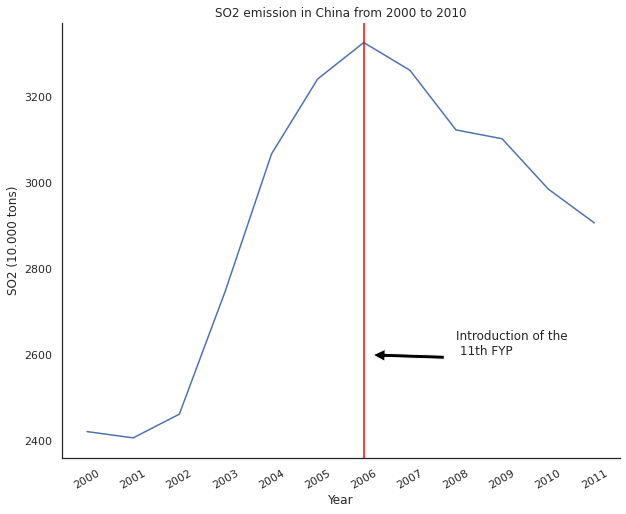

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(var['Year'], var['so2'])
ax.axvline(x='2006', c='red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate('Introduction of the\n 11th FYP', xy=('2006', 2600), xytext=('2008', 2600),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.xlabel('Year')
# Set y-axis label
plt.ylabel('SO2 (10.000 tons)')
plt.xticks(rotation=30)
plt.title('SO2 emission in China from 2000 to 2010')
#plt.show()
plt.savefig("Figures/fig_1.png",
            bbox_inches='tight',
            dpi=600)

# Figure 2: Replicate

![](https://codahosted.io/docs/vZByVL8huL/blobs/bl-00qo5tfgdE/fd2d69dbea92066913d55517e60d1e87dc5fe752ef79831b4415ca43b2ec8897668f47f6922cc67a056452bbda81e3f6a642240595304282cebe9bf57246c6066ce6fffbcbe0b11332d6eb60daf435522f528a51b3835d8136c125aa570434efeb6e8bc2)

In [40]:
query = """
SELECT year, avg(fin_dep) as fin_dep
FROM(
SELECT DISTINCT(1- share_big_loan) AS fin_dep,province_en, year
FROM {}.{}
WHERE so2_intensity > 0 AND tso2 > 500 AND year NOT IN ('2005', '2006', '2007')
)
GROUP BY year
ORDER BY year
    """.format(db, table)
df = s3.run_query(
            query=query,
            database=db,
            s3_output='SQL_OUTPUT_ATHENA',
            filename='fig_2',  # Add filename to print dataframe
            destination_key='SQL_OUTPUT_ATHENA/CSV',  #Use it temporarily
            dtype = {'year':'string', 'fin_dep':'float'}
)
        
df.head()

,year,fin_dep
0,1998,0.37527
1,1999,0.37487
2,2000,0.40796
3,2001,0.41259
4,2002,0.42806


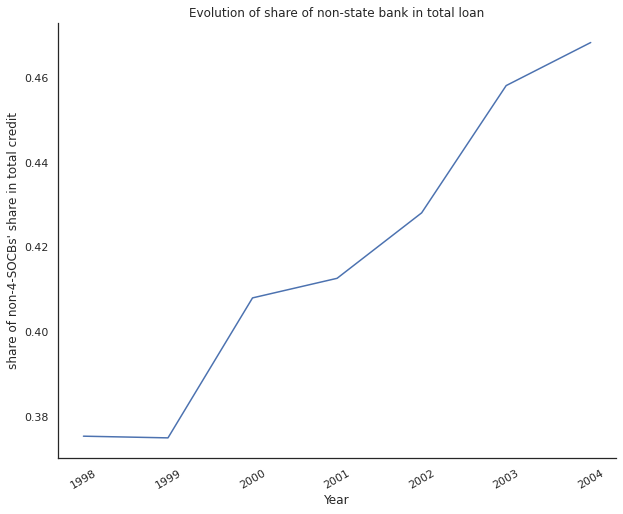

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df['year'], df['fin_dep'])
plt.xlabel('Year')
plt.ylabel("share of non-4-SOCBs' share in total credit")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.title('Evolution of share of non-state bank in total loan')
#plt.show()
plt.savefig("Figures/fig_2.png",
            bbox_inches='tight',
            dpi=600)

# Figure 3: replicate 

![](https://codahosted.io/docs/vZByVL8huL/blobs/bl-vny1krGci-/2df6ba87e3e9d9f3defdb5c0fa2a9aaa0f7e770e29284f176a1f8a7e1d538d3122b8e89587df3e1c1305862e9871705af430018d4818b5b538a519440acc8840a30bd5497032d1a18c736ffe811d61012796f0e799c8a440bee33fac087709fe434afecf)

In [42]:
query = """
SELECT 
  map_keys(pct_change) [1] as key, 
  map_values(pct_change) [1] as pct_change, 
  map_values(target) [1] as target 
FROM 
  (
    SELECT 
      transform_values(
        multimap_agg(province_en, tso2), 
        (k, v) -> CAST(
          v[1] - v[2] AS DECIMAL(16, 5)
        )/ v[1]
      ) as pct_change, 
      transform_values(
        map_agg(province_en, target), 
        (k, v) -> v * 1
      ) as target 
    FROM 
      (
        SELECT 
          CAST(
            SUM(tso2) AS double
          ) as tso2, 
          AVG(target_reduction_so2_p) AS target, 
          province_en, 
          year 
        FROM 
          fin_dep_pollution_baseline_industry 
        WHERE 
          so2_intensity > 0 
          AND tso2 > 500 
          AND year IN ('2002', '2007') 
        GROUP BY 
          year, 
          province_en 
        ORDER BY 
          province_en, 
          year
      ) 
    GROUP BY 
      province_en
  )
    """.format(db, table)
df = s3.run_query(
            query=query,
            database=db,
            s3_output='SQL_OUTPUT_ATHENA',
            filename='fig_3',  # Add filename to print dataframe
            destination_key='SQL_OUTPUT_ATHENA/CSV',  #Use it temporarily
            dtype = {'key':'string', 'pct_change':'float', 'target':'float'}
)
        
df.head()

,key,pct_change,target
0,Anhui,-0.224560,0.23
1,Guizhou,0.317580,2.04
2,Hebei,-0.459812,2.25
3,Jiangsu,-0.141811,2.47
4,Liaoning,-0.823462,1.44


<Figure size 720x576 with 0 Axes>

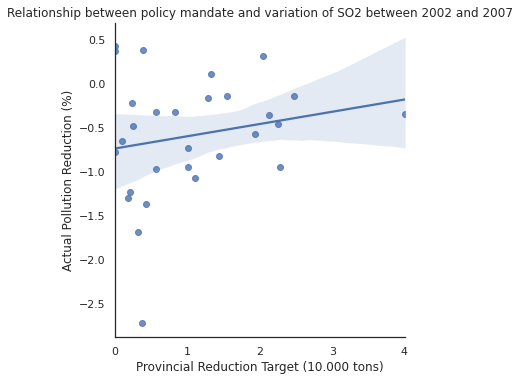

In [43]:
plt.figure(figsize=(10, 8))
ax = sns.lmplot(x='target',
           y="pct_change",
           data=df.loc[lambda x: ~x['key'].isin(['Qinghai'])])
plt.title('Relationship between policy mandate and variation of SO2 between 2002 and 2007')
# Set x-axis label
plt.xlabel('Provincial Reduction Target (10.000 tons)')
# Set y-axis label
plt.ylabel('Actual Pollution Reduction (%)')
plt.savefig("Figures/fig_3.png",
            bbox_inches='tight',
            dpi=600)

# Figure 4: parallel trend

In [2]:
#options(warn=-1)
#library(tidyverse)
#library(lfe)
#library(lazyeval)
#library('progress')
#path = "../../../utils/latex/table_golatex.R"

In [7]:
#import os
#from pathlib import Path
#filename = 'df_{}'.format("fin_dep_pollution_baseline_industry")
#path = os.getcwd()
#path_local = os.path.join(str(Path(path).parent.parent), 
#                              "00_data_catalog/temporary_local_data")
#df_path = os.path.join(path_local, filename + '.csv')

In [21]:
#%get df_path
#df_final <- read_csv(df_path) %>%
#mutate_if(is.character, as.factor) %>%
#    mutate_at(vars(starts_with("fe")), as.factor) %>%
#mutate(
#    year = relevel(as.factor(year), ref='2001'),
#    period = relevel(as.factor(period), ref='FALSE'),
#    polluted_d50i = relevel(as.factor(polluted_d50i), ref='BELOW'),
#    polluted_d75i = relevel(as.factor(polluted_d75i), ref='BELOW'),
#    polluted_d80i = relevel(as.factor(polluted_d80i), ref='BELOW'),
#    polluted_d85i = relevel(as.factor(polluted_d85i), ref='BELOW'),
#    polluted_d90i = relevel(as.factor(polluted_d90i), ref='BELOW'),
#    polluted_d95i = relevel(as.factor(polluted_d95i), ref='BELOW'),
#    polluted_mi = relevel(as.factor(polluted_mi), ref='BELOW'),
#    d_avg_ij_o_city_mandate = relevel(as.factor(d_avg_ij_o_city_mandate), ref="FALSE"),
#   fin_dev = 1- share_big_loan,
#    lag_fin_dev = 1- lag_share_big_loan,
#)%>%
#group_by(province_en, ind2, year, period, fe_p_i , fe_t_i , fe_p_t) %>%
#summarize(
#    tso2 = sum(tso2),
#    tcod = sum(tcod),
#   twaste_water = sum(twaste_water),
#    output = sum(output),
#    employment = sum(employment),
#    capital = sum(capital),
#    target_reduction_so2_p = max(target_reduction_so2_p),
#    target_reduction_co2_p = max(target_reduction_co2_p),
#    lag_credit_supply = max(lag_credit_supply),
#    lag_credit_supply_long_term = max(lag_credit_supply_long_term),
#    fin_dev = max(fin_dev),
#    lag_fin_dev = max(lag_fin_dev),
#   credit_constraint = max(credit_constraint),
#) %>%
#ungroup()%>%
#mutate(
#    year = relevel(as.factor(year), ref='2001'),
#    year1 = relevel(as.factor(year), ref='2005')
#)

#head(df_final)

In [12]:
#t_0 <- felm(log(tso2) ~  
#           credit_constraint * target_reduction_so2_p * year
#           |  fe_p_i + fe_t_i + fe_p_t|0 | province_en +ind2, df_final%>% 
#             filter( target_reduction_so2_p > 0),
#            exactDOF = TRUE)

#dep <- "Dependent variable: SO2 emission"
#fe1 <- list(
#    c("Province-industry", "Yes"),
#    c("Province-industry", "Yes"),
#    c("Province-Time", "Yes")
#            )

In [19]:
#summary(t_0)

In [20]:
#t_0$coef

# Summary statistics

In [65]:
for i in dtypes:
    if dtypes[i] == 'varchar(5)' or dtypes[i] == 'map<double,boolean>':
        dtypes[i] = 'string'

In [68]:
path_local = os.path.join(str(Path(path).parent.parent), 
                              "00_data_catalog/temporary_local_data")
filename = 'df_{}'.format(table)
df_path = (
    pd.read_csv(os.path.join(path_local, filename + '.csv'), dtype = dtypes)
    .assign(
        fin_dev = lambda x: 1- x['share_big_loan']
    )
    )

In [69]:
list_to_sum = [
    "tso2",
    "lag_credit_supply",
    "lag_credit_supply_long_term",
    "fin_dev",
    "output",
    "employment",
    "capital",
    "credit_constraint",
    "target_reduction_so2_p"
]

In [134]:
df_latex = (
    df_path.reindex(columns = list_to_sum)
    .loc[lambda x: x['tso2'] > 500]
    .assign(
        tso2 = lambda x: x['tso2']/10000,
        output = lambda x: x['output']/10000,
        employment = lambda x: x['employment']/1000,
        capital = lambda x: x['capital']/10000,
    )
    .describe()
    #.T
    .rename(
    columns={
        "tso2": "SO2",
        "lag_credit_supply": "All loan",
        "lag_credit_supply_long_term": "Long-term loan",
        "fin_dev": "Financial development",
        "output": "Output",
        "employment": "Employment",
        "capital": "Capital",
        "credit_constraint": "credit constraint",
        "target_reduction_so2_p": "S02 mandate",
    }
)   
    .apply(lambda x: round(x,2))
    .T
    .assign(
    count = lambda x: x['count'].astype(int))
    .to_latex()
)
df_latex

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} &  count &    mean &      std &   min &    25\\% &    50\\% &     75\\% &       max \\\\\n\\midrule\nSO2                   &  41505 &  130.88 &   487.02 &  0.05 &   2.37 &  12.04 &   60.16 &  13701.62 \\\\\nAll loan              &  41505 &    0.86 &     0.26 &  0.45 &   0.68 &   0.81 &    0.97 &      2.99 \\\\\nLong-term loan        &  41505 &    0.32 &     0.17 &  0.09 &   0.20 &   0.28 &    0.43 &      1.74 \\\\\nFinancial development &  28206 &    0.45 &     0.08 &  0.16 &   0.41 &   0.45 &    0.50 &      0.61 \\\\\nOutput                &  41505 &  295.39 &  1142.54 &  0.00 &  15.82 &  57.59 &  205.06 &  77324.41 \\\\\nEmployment            &  41505 &    9.46 &    21.98 &  0.00 &   1.13 &   3.27 &    8.92 &   1120.25 \\\\\nCapital               &  41505 &   66.18 &   204.75 &  0.00 &   4.38 &  15.72 &   52.07 &   7493.93 \\\\\ncredit constraint     &  41505 &   -0.52 &     0.61 & -2.59 &  -0.72 &  -0.44 &   -0.23 &      0.62 \\\\\nS02 man

In [90]:
import tex2pix
from PyPDF2 import PdfFileMerger
from wand.image import Image as WImage

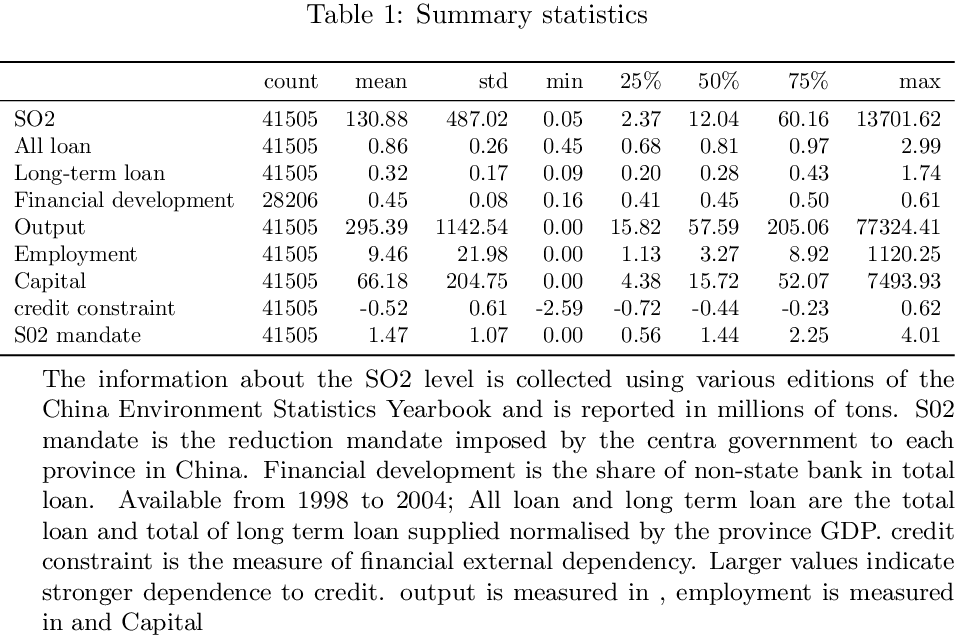

In [135]:
folder = 'Tables'
table_number = 1
title = 'Summary statistics'
tb_note = """
The information about the SO2 level is collected using various editions of the China Environment Statistics Yearbook and is reported in millions of tons.
S02 mandate is the reduction mandate imposed by the centra government to each province in China.
Financial development is the share of non-state bank in total loan. Available from 1998 to 2004; All loan and long term loan are the total loan and total of long term loan supplied
normalised by the province GDP.
credit constraint is the measure of financial external dependency. Larger values indicate stronger dependence to credit.
output is measured in ,  employment is measured in and Capital 
"""
with open('{}/table_{}.tex'.format(folder,table_number), 'w') as fout:
    for i in range(len( df_latex)):
        if i ==0:
            header= "\documentclass[preview]{standalone} \n\\usepackage[utf8]{inputenc}\n" \
            "\\usepackage{booktabs,caption,threeparttable, siunitx, adjustbox}\n\n" \
            "\\begin{document}"
            top =  '\n\\begin{adjustbox}{width=\\textwidth, totalheight=\\textheight-2\\baselineskip,keepaspectratio}\n'
            table_top = "\n\\begin{table}[!htbp] \centering"
            table_title = "\n\caption{%s}\n" % title
            
            fout.write(header)
            fout.write(table_top)
            fout.write(table_title)
            fout.write(top)
           
        fout.write( df_latex[i])
    
    bottom =  '\n\\end{adjustbox}\n'
    tb_note_top = "\n\\begin{tablenotes}\n\small\n\item"
    table_bottom = "\n\end{table}"
    footer = "\n\n\\end{document}"
    tb_note_bottom = "\n\end{tablenotes}"
    fout.write(bottom)
    fout.write(tb_note_top)
    fout.write(tb_note)
    fout.write(tb_note_bottom)
    fout.write(table_bottom)
    fout.write(footer)
 
f = open('{}/table_{}.tex'.format(folder,table_number))
r = tex2pix.Renderer(f, runbibtex=False)
r.mkpdf('{}/table_{}.pdf'.format(folder,table_number))
img = WImage(filename='{}/table_{}.pdf'.format(folder,table_number),
resolution = 200)
display(img)

# Generate reports

In [ ]:
import os, time, shutil, urllib, ipykernel, json
from pathlib import Path
from notebook import notebookapp
import sys
path = os.getcwd()
parent_path = str(Path(path).parent.parent.parent)
sys.path.append(os.path.join(parent_path, 'utils'))
import make_toc
import create_report

In [ ]:
name_json = 'parameters_ETL_pollution_credit_constraint.json'
path_json = os.path.join(str(Path(path).parent.parent), 'utils',name_json)

In [ ]:
create_report.create_report(extension = "html", keep_code = False, notebookname = None)